In [1]:
import opendatasets as od

####  Here, In this project, we will detect or classify whether a driver is alert while driving or not on the basis of differnt physiological, environmental, and vechicular data. The columns p1 to p7 indicate physiological data, E1 to E11 indicate environmental data, and V1 to v11 indicate vehicular data. 

In [2]:
## Let's import all our fundamental libraries 
import pandas as pd
import numpy as np
import os


## Downloading the Data

The dataset is available at https://www.kaggle.com/c/stayalert/data


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [4]:
od.download('https://www.kaggle.com/c/stayalert/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mdnazrulislamabir
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 18.2M/18.2M [00:07<00:00, 2.50MB/s]



Extracting archive .\stayalert/stayalert.zip to .\stayalert


## Let's load the training dataset

In [5]:
train_df = pd.read_csv("./stayalert/fordTrain.csv")
train_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


## Now we will load the testing dataset

In [7]:
test_df = pd.read_csv("./stayalert/fordTest.csv")
test_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.94350,1000,60.0000,0.302277,508,118.1100,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.32120,1000,60.0000,0.302277,508,118.1100,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.51400,1000,60.0000,0.302277,508,118.1100,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.26150,1000,60.0000,0.302277,508,118.1100,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.36660,1000,60.0000,0.302277,504,119.0480,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,99,1206,?,37.3798,17.40260,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,658,0,0.0,0,1,16.6850
120836,99,1207,?,37.1653,5.37419,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,657,0,0.0,0,1,16.6840
120837,99,1208,?,36.9131,9.26657,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,655,0,0.0,0,1,16.6487
120838,99,1209,?,36.6297,10.41710,892,67.2646,0.131030,752,79.7872,...,-0.07,240,0.00000,0,657,0,0.0,0,1,16.6314


## Load the Solution dataset into pandas dataframe

In [9]:
solution_df = pd.read_csv("./stayalert/Solution.csv")
solution_df

,TrialID,ObsNum,Prediction,Indicator
0,0,0,1,Public
1,0,1,1,Public
2,0,2,1,Private
3,0,3,1,Private
4,0,4,1,Private
...,...,...,...,...
120835,99,1206,1,Private
120836,99,1207,1,Private
120837,99,1208,1,Private
120838,99,1209,1,Private


Here, our training dataset contains 604329  rows and 33 columns. The dataset contains mostly numeric columns. Our objective is to create a model to predict the value in the column `IsAlert`.

Let's us check the data types and missing values in the various `columns` in the training dataset.

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

We can clearly see that the total rows are 604329, and none of the columns have missing value. Hence, We will not have to perform the section of Imputing null values for this dataset respectively.

Furthermore, the different datatypes in the `training` datasets are mainly float64, and int64.

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  120840 non-null  int64  
 1   ObsNum   120840 non-null  int64  
 2   IsAlert  120840 non-null  object 
 3   P1       120840 non-null  float64
 4   P2       120840 non-null  float64
 5   P3       120840 non-null  int64  
 6   P4       120840 non-null  float64
 7   P5       120840 non-null  float64
 8   P6       120840 non-null  int64  
 9   P7       120840 non-null  float64
 10  P8       120840 non-null  int64  
 11  E1       120840 non-null  float64
 12  E2       120840 non-null  float64
 13  E3       120840 non-null  int64  
 14  E4       120840 non-null  int64  
 15  E5       120840 non-null  float64
 16  E6       120840 non-null  int64  
 17  E7       120840 non-null  int64  
 18  E8       120840 non-null  int64  
 19  E9       120840 non-null  int64  
 20  E10      120840 non-null  

we can see the same result for testing data as the training data has no missing values 

# Exploratory Data Analysis 

It is always a good practice to visually represent the relation between other feature columns and target columns. Now I will explore the data from features and target columns using different libraries like matplotlib, Seaborn and plotly 

In [16]:
## Let's import our data visualization libraries 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline 


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = 'white'

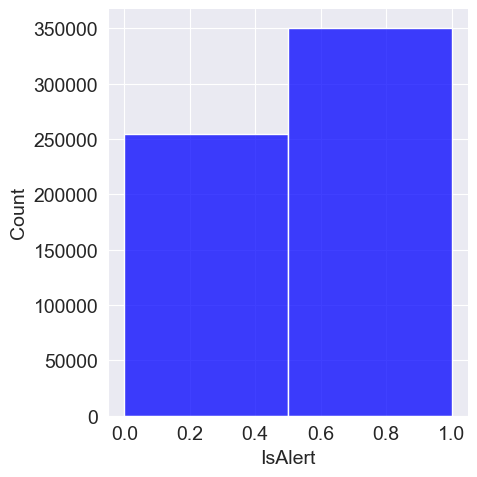

In [17]:
## Presenting the total outcomes of IsAlert target column

sns.displot(x=train_df.IsAlert, bins=2, color='blue');

Here we can clearly see that the total number of values 0 (when the driver is not alert) is close to 250,000 whereas the total number of values 1 (when the driver is alert) is about 350,0000 respectively. 

#### According to the dataset provided in google, the models that makes less use of physiological features are said to be of additional interest

So, from all the feature columns, let's check which columns has the highest average and compare them with other 

In [18]:
# Using traditional for loop way to find out which Psychological fetaure column has the maximum mean
count  = 0
coln =''

for i in train_df[train_df.columns.tolist()[3:10]]:
    mean_value = train_df[i].mean()
    if (mean_value > count):
        count = mean_value
        coln = i

In [19]:
coln

'P3'

Hence, the Psychological feature column with highest mean is P3. Thus, we will compare this particular feature column with the similar vechicular and environmental feature columns.

In [20]:
## Let's see which Environmental feature column has the highest mean
train_df[train_df.columns.tolist()[11:22]].mean()

E1      10.512332
E2     102.790045
E3       0.290565
E4      -4.230136
E5       0.016262
E6     358.674738
E7       1.757296
E8       1.383058
E9       0.876787
E10     63.311256
E11      1.315265
dtype: float64

#### So, from the Environmental feature column we will use column E6 for comparisaion 

In [22]:
# Let's see which Vehicular feature column has the highest mean 
train_df[train_df.columns.tolist()[22:]].mean()

V1       76.965412
V2       -0.037710
V3      573.786433
V4       19.961030
V5        0.179814
V6     1715.688383
V7        0.000000
V8       12.710354
V9        0.000000
V10       3.312257
V11      11.668277
dtype: float64

#### So, In the Vehicular columns we can see that V6 have the highest mean, and we will use V6 for our comparision 

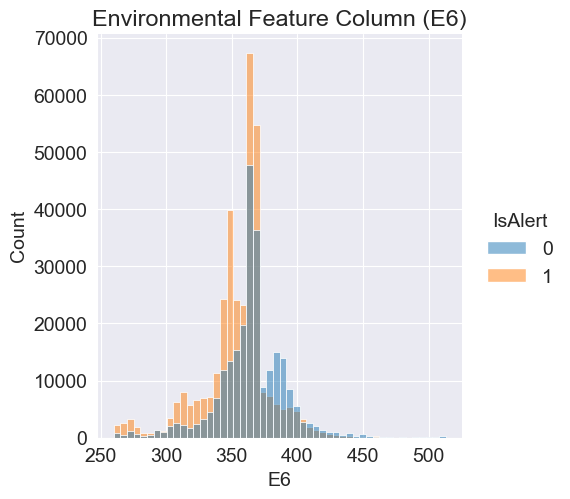

In [25]:
sns.displot(data=train_df, x='E6', hue='IsAlert', bins=50);
plt.title("Environmental Feature Column (E6)");

In the E6 Feature column from the above histogram, we can see that 1112 times the value of E6 ranging from 260-269 have the IsAlert column's value to be 0. 

Similarly, we can also see that the above distribution is normal. In more than 120, 000 rows when E6 columns value ranged from 360 -369, the driver was alert which is the highest number in the entire dataset for this particular feature.

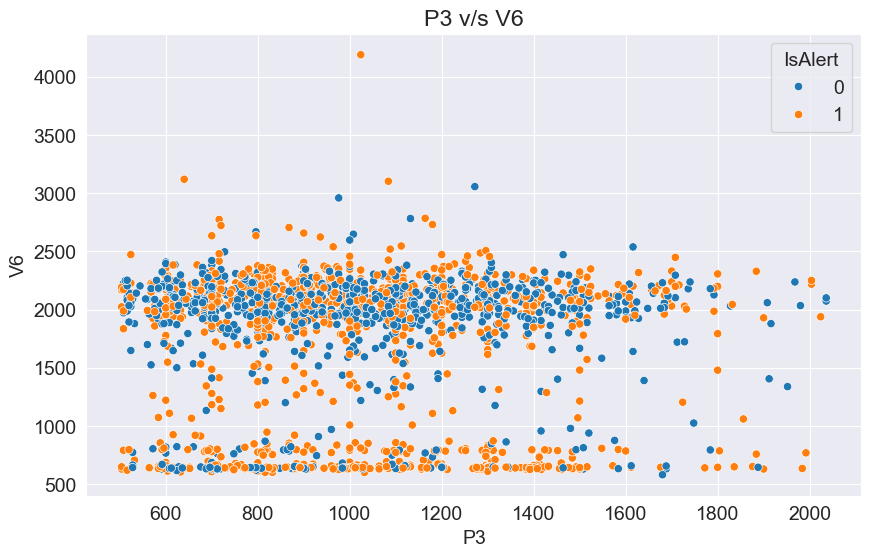

In [26]:
# P3 vs V6 (using 2000 random samples out of more than 600,000 values)
sns.scatterplot(x = 'P3', y = 'V6', data = train_df[['P3','V6']].sample(2000, random_state = 42), hue = train_df.IsAlert)
plt.title('P3 v/s V6');

Text(0.5, 1.0, 'Psychological Feature Column (p3)')

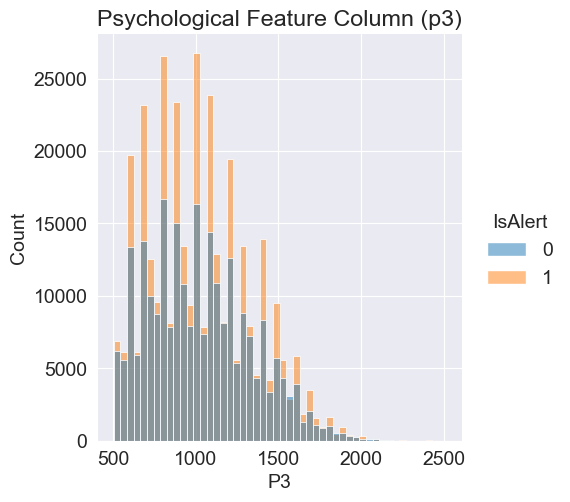

In [27]:
# visualizing the distribution of medical charges in connection with region

fig = sns.displot(data=train_df,
                 x='P3',
                 hue='IsAlert',
                 bins=50)

plt.title("Psychological Feature Column (p3)")

#### From the graph above we can make following decision
1. Most of the time the psychological feature P3 value was less then 1500
2. For the feature P3, the total counts of Psychological value of the driver was higher when driver was  alert 

In [28]:
train_df.IsAlert.corr(train_df.P3)

0.005167867220705483

In [29]:
train_df.IsAlert.corr(train_df.E6)

-0.18919786734413227

In [30]:
train_df.IsAlert.corr(train_df.V6)

-0.24415011393576505

Lets explain the correlation of feature columns `P3`, `E6`, and `V6`.

The absolute value of a correlation determines the strength. If a correlation between two variables is -1 or +1, the absolute value is 1, which indicates the perfect linear relationship.

Similarly, the sign of correlation coefficient determines the direction of the relationship.  ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/))

Thus, among the three feature columns, `V6` column is the most strongly correlated with `IsAlert` target column. However, the relationship is negative.

## Preprocessing and Feature Engineering 

In [31]:
train_df.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,0.0,10.512332,102.790045,0.290565,-4.230136,0.016262,358.674738,1.757296,1.383058,0.876787,63.311256,1.315265,76.965412,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,0.0,14.049071,127.258629,1.006162,35.508596,0.002304,27.399973,2.854852,1.608807,0.328681,18.891029,5.247204,44.387031,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,0.0,0.000000,0.000000,0.000000,-250.000000,0.008000,260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,0.0,0.000000,0.000000,0.000000,-8.000000,0.015686,348.000000,0.000000,0.000000,1.000000,52.000000,0.000000,41.930000,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.016001,365.000000,1.000000,1.000000,1.000000,67.000000,0.000000,100.400000,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,0.0,28.240000,211.584000,0.000000,6.000000,0.016694,367.000000,2.000000,2.000000,1.000000,73.000000,0.000000,108.500000,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,0.0,243.991000,359.995000,4.000000,260.000000,0.023939,513.000000,25.000000,9.000000,1.000000,127.000000,52.400000,129.700000,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [32]:
# let's print a random sample of 5 rows from training data frame 
train_df.sample(5)

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
131397,108,871,0,31.1953,10.3732,704,85.2273,0.093407,884,67.8733,0,25.887,203.019,0,0,0.015623,354,1,2,1,74,0.0,95.14,0.000,255,4.50625,0,1854,0,0.0,0,4,7.00893
141686,117,285,0,43.3516,16.9062,780,76.9231,0.084326,824,72.8155,0,0.000,0.000,0,-34,0.015371,375,1,3,0,100,0.0,98.08,0.070,752,5.99375,0,1911,0,15.2,0,4,8.61505
426864,353,107,0,38.1881,13.5980,1932,31.0559,0.129732,824,72.8155,0,0.000,0.000,0,12,0.018521,366,0,2,1,45,0.0,89.42,0.000,240,3.01875,0,1743,0,0.0,0,4,6.36999
556503,460,468,0,27.4970,15.1716,1188,50.5051,0.106381,904,66.3717,0,0.000,0.000,0,20,0.016505,377,0,0,1,72,0.0,111.27,0.560,752,7.48125,0,2193,0,21.9,0,4,12.51320
45578,37,845,1,30.1440,10.8944,1388,43.2277,0.096002,604,99.3377,0,29.532,235.970,0,18,0.016820,345,1,1,1,65,0.0,104.43,-0.455,255,1.48750,1,2096,0,26.5,0,4,9.76847


In [33]:
# let's make a copy of our original train_df dataframe and test_df dataframe 

train_new_df = train_df.copy()
test_new_df = test_df.copy()

##### From our `Training` and `Testing` dataframes, the TrailID and ObsNum columns may not be ver useful for predicting the driver's alertness. So, let's remove thses columns from our new copies of the train_df and test_df

In [34]:
## Let's select the columns to be removed 
cols_tobe_removed = (train_df.columns.tolist())[0:2]
cols_tobe_removed

['TrialID', 'ObsNum']

In [35]:
train_new_df.drop(columns=cols_tobe_removed, axis=1, inplace=True)
test_new_df.drop(columns=cols_tobe_removed, axis=1, inplace=True)

In [40]:
train_new_df.shape

(604329, 31)

In [41]:
test_new_df.shape

(120840, 31)

In [42]:
train_new_df.describe()

,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,0.0,10.512332,102.790045,0.290565,-4.230136,0.016262,358.674738,1.757296,1.383058,0.876787,63.311256,1.315265,76.965412,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,0.0,14.049071,127.258629,1.006162,35.508596,0.002304,27.399973,2.854852,1.608807,0.328681,18.891029,5.247204,44.387031,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,0.0,0.000000,0.000000,0.000000,-250.000000,0.008000,260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,0.0,0.000000,0.000000,0.000000,-8.000000,0.015686,348.000000,0.000000,0.000000,1.000000,52.000000,0.000000,41.930000,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.016001,365.000000,1.000000,1.000000,1.000000,67.000000,0.000000,100.400000,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,0.0,28.240000,211.584000,0.000000,6.000000,0.016694,367.000000,2.000000,2.000000,1.000000,73.000000,0.000000,108.500000,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,0.0,243.991000,359.995000,4.000000,260.000000,0.023939,513.000000,25.000000,9.000000,1.000000,127.000000,52.400000,129.700000,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [43]:
test_new_df.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.0,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.0,120840.000000,120840.0,120840.000000,120840.000000
mean,35.450222,12.008451,1026.668355,64.148812,0.122339,707.701456,86.174020,0.0,10.648237,98.202840,0.191154,-0.572095,0.015950,347.686395,1.358284,1.614176,0.868032,68.655238,1.770682,78.696121,-0.036024,562.097443,32.215433,0.179394,1732.128037,0.0,12.838320,0.0,3.378633,13.899704
std,3.303869,4.351161,310.874514,19.995102,0.113811,90.398496,11.024309,0.0,13.950893,125.644623,0.776454,26.663652,0.002584,47.971289,2.376400,1.537636,0.338457,17.456849,6.030855,42.534170,0.392249,300.358571,97.893439,0.383684,594.847283,0.0,12.315979,0.0,1.213857,1.504704
min,17.776300,-25.911800,504.000000,25.996500,0.040217,468.000000,49.342100,0.0,0.000000,0.000000,0.000000,-250.000000,0.008000,260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.605000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,9.538220
25%,33.456300,9.600658,788.000000,49.180300,0.089515,636.000000,76.923100,0.0,0.000000,0.000000,0.000000,-6.000000,0.014804,303.000000,0.000000,0.000000,1.000000,65.000000,0.000000,56.540000,-0.175000,255.000000,1.487500,0.000000,1489.000000,0.0,0.000000,0.0,4.000000,12.775275
50%,34.877800,11.288900,1000.000000,60.000000,0.101191,700.000000,85.714300,0.0,0.000000,0.000000,0.000000,0.000000,0.015875,356.000000,1.000000,2.000000,1.000000,71.000000,0.000000,101.800000,0.000000,497.000000,3.018750,0.000000,2015.000000,0.0,12.300000,0.0,4.000000,13.470900
75%,36.862200,13.542925,1220.000000,76.142100,0.115462,780.000000,94.339600,0.0,28.541000,211.328000,0.000000,6.000000,0.017387,367.000000,2.000000,3.000000,1.000000,77.000000,0.000000,107.650000,0.070000,767.000000,5.993750,0.000000,2123.000000,0.0,22.800000,0.0,4.000000,15.223900
max,81.819600,39.757300,2308.000000,119.048000,4.667770,1216.000000,128.205000,0.0,64.693000,359.999000,4.000000,254.000000,0.023939,513.000000,25.000000,9.000000,1.000000,127.000000,36.800000,122.650000,3.115000,1023.000000,478.494000,1.000000,3408.000000,0.0,82.100000,0.0,7.000000,18.322500


In the `train_new_df` and `test_new_df` DataFrames, different feature columns have values in different ranges. In the training dataframe, columns P1 and P2 have minimum values and means to be 22.481200,	-45.629200, 35.449020,	11.996525. When compared to another feature column P3, its minimum value is 504 and mean is 1026.671035 which are way higher than the minimum value and mean of previous columns. 

This pattern also follows in different columns of both testing and training dataframes. When we pass the feature and target columns to models, the models ultimately get trained with numbers as scikitlearn only works with numeric values. This may result in columns with higher values to have higher importances or weights in descision making which may result in false predictions. 

Hence, It is the best practice to convert or bring the values of all feature columns in a same range like (0,1) or (-1,1) respectively. We can do so by using the process called `scaling`.

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

###### The `StandardScaler` scales or transform the values in the numeric columns such that they have a mean 0 and standard deviation 1

In [45]:
numeric_feature_cols = train_new_df.columns.tolist()[1:]
numeric_feature_cols

['P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11']

Since, the dataset provider in `kaggle` has mentioned that the models which make the use of least number of `Psychological` columns will be most favoured, we will drop all the `Psychological` columns other than the one that has the maximum mean that is `P3`.

In [46]:
del numeric_feature_cols[0:8]
numeric_feature_cols.insert(0, 'P3')

In [47]:
numeric_feature_cols

['P3',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11']

In [48]:
# Let's scale our numeric columns using StandardScaler

scaler.fit(train_new_df[numeric_feature_cols])

StandardScaler()

In [49]:
# The calculated mean for each column after scaling using StandardScaler 
list(scaler.mean_)

[1026.6710351480733,
 10.512332350425016,
 102.79004483650462,
 0.2905652384710977,
 -4.230136233740231,
 0.016262422963319655,
 358.6747384289021,
 1.7572961085766197,
 1.3830579038900996,
 0.8767873128709693,
 63.31125595495169,
 1.3152650294789754,
 76.96541183692989,
 -0.03770957541339237,
 573.7864325557767,
 19.96102967853602,
 0.1798143064456612,
 1715.6883833143868,
 0.0,
 12.710354459243227,
 0.0,
 3.3122570652740477,
 11.66827714039869]

In [50]:
## let's scale and transform our columns in the training and testing set

# for training set
train_new_df[numeric_feature_cols] = scaler.transform(train_new_df[numeric_feature_cols])

# for testing set

test_new_df[numeric_feature_cols] = scaler.transform(test_new_df[numeric_feature_cols])

#### Now, Let's check our scaled training and testing set

In [51]:
train_new_df[numeric_feature_cols].sample(3)

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
5583,-0.448371,-0.747405,1.118911,-0.288786,0.119130,-0.168143,0.303842,-0.615548,-0.859680,0.37487,-1.233987,-0.25066,-1.733963,-0.859852,-1.11854,1.272858,-0.468227,-1.728777,0.0,-1.102174,0.0,-1.859348,0.385642
154239,-0.008636,-0.748259,-0.807726,-0.288786,0.119130,0.460729,0.267346,-0.615548,-0.859680,0.37487,-1.181051,-0.25066,-1.733963,-0.859852,-1.11854,-0.149536,-0.468227,-1.720689,0.0,-1.102174,0.0,-1.859348,-0.375503
554986,0.431098,-0.748259,-0.807726,-0.288786,0.006481,-0.058774,-0.864043,-0.615548,0.383478,0.37487,0.459941,-0.25066,0.753928,0.786613,-1.11854,-0.244269,-0.468227,0.730070,0.0,-0.330414,0.0,0.553032,-0.041882


In [52]:
test_new_df[numeric_feature_cols].sample(3)

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
81195,0.288831,-0.748259,-0.807726,0.705091,-1.120008,0.980233,1.289245,-0.265267,0.383478,0.37487,0.301135,4.704364,-1.613883,0.786613,-0.260667,-0.149536,-0.468227,-1.592893,0.0,-1.102174,0.0,-1.055221,0.019349
40642,0.288831,1.294725,0.548136,-0.288786,0.062806,-0.332197,-1.703461,-0.265267,1.005057,0.37487,0.089394,-0.250660,0.602983,0.093365,-0.260667,-0.267780,-0.468227,0.503597,0.0,-1.102174,0.0,0.553032,0.106612
48162,0.883766,-0.748259,-0.807726,-0.288786,0.119130,-0.250170,-2.214411,-0.265267,-0.238101,0.37487,0.459941,-0.250660,0.344348,0.093365,-1.068274,-0.267780,-0.468227,0.126682,0.0,1.065692,0.0,0.553032,0.151305


Now, the next step  is `Preparing the Training and Validation Set` where we will use the `TrainTestSplit` to split the training set into `Training` and `Validation` set respectively.

## Preparing the Training and Validation Set 

In [53]:
# let's access our training dataframe
train_new_df[numeric_feature_cols]

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,1.207100,-0.748259,-0.807726,0.705091,-0.444114,-0.168143,-1.265504,-0.265267,-0.238101,0.37487,-0.334088,-0.25066,0.563106,0.526645,0.597205,-0.220759,-0.468227,0.468009,0.0,0.059802,0.0,0.553032,0.315280
1,1.207100,-0.748259,-0.807726,0.705091,-0.444114,-0.168143,-1.265504,-0.265267,-0.238101,0.37487,-0.334088,-0.25066,0.563557,1.219894,0.597205,-0.220759,-0.468227,0.471244,0.0,0.059802,0.0,0.553032,0.312512
2,1.207100,-0.748259,-0.807726,0.705091,-0.444114,-0.168143,-1.265504,-0.265267,-0.238101,0.37487,-0.334088,-0.25066,0.563331,0.786613,0.597205,-0.220759,-0.468227,0.477714,0.0,0.059802,0.0,0.553032,0.312582
3,1.207100,-0.748259,-0.807726,0.705091,-0.444114,-0.168143,-1.265504,-0.265267,-0.238101,0.37487,-0.334088,-0.25066,0.563782,0.266677,0.597205,-0.220759,-0.468227,0.484185,0.0,0.059802,0.0,0.553032,0.311888
4,1.207100,-0.748259,-0.807726,0.705091,-0.444114,-0.168143,-1.265504,-0.265267,-0.238101,0.37487,-0.334088,-0.25066,0.565584,0.526645,0.597205,-0.220759,-0.468227,0.487420,0.0,0.059802,0.0,0.553032,0.312794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,-0.732905,0.519228,0.937619,-0.288786,0.119130,0.050595,-1.338497,0.085015,0.383478,0.37487,0.036459,-0.25066,0.327677,0.786613,-1.118540,-0.267780,-0.468227,0.138005,0.0,1.533952,0.0,0.553032,0.417037
604325,-0.732905,0.519228,0.937619,-0.288786,0.119130,0.050595,-1.338497,0.085015,0.383478,0.37487,0.036459,-0.25066,0.327677,0.786613,-1.118540,-0.267780,-0.468227,0.138005,0.0,1.533952,0.0,0.553032,0.416081
604326,-0.732905,0.519228,0.937619,-0.288786,0.119130,0.050595,-1.338497,0.085015,0.383478,0.37487,0.036459,-0.25066,0.328803,0.526645,-1.118540,-0.267780,-0.468227,0.136388,0.0,1.611995,0.0,0.553032,0.417108
604327,-0.732905,0.519228,0.937619,-0.288786,0.119130,0.050595,-1.338497,0.085015,0.383478,0.37487,0.036459,-0.25066,0.328803,0.526645,-1.118540,-0.267780,-0.468227,0.136388,0.0,1.611995,0.0,0.553032,0.418618


In [54]:
## Using train test split to split the scaled training set into training and validation set

# Import TrainTestSplit
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_new_df[numeric_feature_cols], train_new_df['IsAlert'], random_state=42, test_size=0.2)

In [55]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((483463, 23), (120866, 23), (483463,), (120866,))

<b>Here, our training dataset is extremely large and my system is taking very long to fit and predict through the dataset. So,
I have randomly selected 50,000 rows for the testing set and 10,000 for validation set. </b>

In [56]:
# Let's join the X_train dataframe and y_train series
trainingSet = X_train.join(y_train)
trainingSet

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,IsAlert
517921,1.026033,-0.748259,-0.807726,-0.288786,0.119130,0.980233,0.303842,-0.615548,-0.859680,0.374870,0.036459,4.399439,-0.974732,0.526645,-1.068274,-0.291982,-0.468227,-1.592893,0.0,-1.102174,0.0,-0.251094,0.503847,1
540287,-1.082106,-0.748259,-0.807726,-0.288786,0.119130,2.101267,0.267346,-0.615548,-0.859680,0.374870,0.830487,-0.250660,0.394588,0.526645,1.455078,-0.244269,-0.468227,0.220506,0.0,0.103160,0.0,0.553032,-0.006108,0
244957,1.853768,-0.748259,-0.807726,-0.288786,0.119130,-0.277513,-0.499079,0.085015,-0.238101,0.374870,0.089394,-0.250660,0.761362,-0.079947,-0.260667,-0.291982,-0.468227,0.743011,0.0,1.681367,0.0,0.553032,0.270053,1
374229,1.543367,1.334087,1.923399,-0.288786,-0.106168,1.034918,0.121360,0.085015,1.005057,0.374870,0.142329,-0.250660,0.716529,0.093365,-0.210401,-0.291982,-0.468227,0.662128,0.0,0.189874,0.0,0.553032,-0.435234,0
471795,0.185364,-0.748259,-0.807726,-0.288786,0.231779,-0.550936,-3.309303,-0.265267,-0.238101,0.374870,-0.016476,-0.250660,0.718332,0.526645,-1.118540,-0.291982,-0.468227,0.655657,0.0,-1.102174,0.0,0.553032,0.063448,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,-1.004505,-0.304101,0.702900,-0.288786,-0.725737,-0.058774,2.019174,2.186701,1.005057,-2.667592,1.942127,-0.250660,-0.666308,0.526645,0.597205,-0.220759,-0.468227,-1.372891,0.0,-1.102174,0.0,0.553032,-0.443651,0
259178,-0.034503,1.648343,1.752904,-0.288786,-0.218817,-0.113459,-0.207108,0.085015,-0.238101,0.374870,0.248200,-0.250660,0.877838,0.786613,1.455078,-0.220759,-0.468227,0.872424,0.0,-1.102174,0.0,0.553032,0.362862,1
365838,-0.357837,1.344052,-0.762440,-0.288786,-0.387790,-0.004090,0.267346,0.085015,-0.859680,0.374870,-1.075181,-0.250660,0.456318,0.266677,-1.118540,-0.315493,-0.468227,0.303007,0.0,0.814220,0.0,0.553032,-0.422174,0
131932,-0.319037,1.336934,0.824353,-0.288786,0.006481,-0.222828,-0.280100,-0.265267,-0.238101,0.374870,0.512876,-0.250660,0.542605,0.093365,0.597205,-0.220759,-0.468227,0.419479,0.0,0.554076,0.0,0.553032,-0.305589,0


In [57]:
# X_train = trainingSet.sample(50000, random_state = 42)[trainingSet.columns.tolist()[0:-1]]
# X_train

In [58]:
# y_train = trainingSet.sample(50000, random_state=42)['IsAlert']
# y_train

In [59]:
validationSet = X_val.join(y_val)
validationSet

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,IsAlert
551187,0.262964,1.551468,0.548411,-0.288786,0.344428,-0.004090,1.216253,0.435296,0.383478,0.37487,0.142329,-0.25066,0.704589,-0.079947,-1.068274,-0.291982,-0.468227,0.705805,0.0,0.831563,0.0,0.553032,-0.063343,0
155822,-0.409571,-0.742066,-0.652994,-0.288786,0.119130,0.870864,0.267346,-0.615548,0.383478,0.37487,-0.651699,-0.25066,-1.733963,-0.599884,-1.118540,-0.149536,-0.468227,-1.706130,0.0,-1.102174,0.0,-1.859348,-0.199969,1
186872,-0.306104,1.284048,0.935568,-0.288786,-0.556763,-0.250170,-0.061122,-0.265267,-0.238101,0.37487,0.301135,-0.25066,0.509487,-0.599884,0.647471,-0.267780,-0.468227,0.443744,0.0,-0.729301,0.0,0.553032,-0.145542,1
66220,0.159497,1.538229,0.526251,-0.288786,0.231779,-0.058774,-0.791050,-0.265267,-0.238101,0.37487,-0.016476,-0.25066,0.771275,0.266677,-0.260667,-0.267780,-0.468227,0.728452,0.0,-0.408457,0.0,0.553032,-0.238162,1
541241,0.857899,-0.748259,-0.807726,-0.288786,0.119130,-0.386882,1.909685,-0.615548,-0.859680,0.37487,0.248200,-0.25066,0.699182,-0.339916,1.505344,-0.315493,-0.468227,0.642716,0.0,0.571419,0.0,0.553032,-0.082187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70728,0.185364,-0.748259,-0.807726,-0.288786,0.288103,-0.222828,-0.718057,-0.265267,-0.238101,0.37487,0.459941,-0.25066,0.958943,0.093365,-0.260667,-0.244269,-0.468227,0.940366,0.0,-0.503843,0.0,0.553032,-0.268538,1
438945,-0.991572,-0.748259,-0.807726,-0.288786,-1.120008,1.636448,-1.849446,0.435296,-0.238101,0.37487,0.936358,-0.25066,0.667867,-0.079947,0.597205,-0.267780,-0.468227,0.584480,0.0,-0.408457,0.0,0.553032,0.166816,1
557129,-0.461304,1.577306,0.209738,-0.288786,-0.331465,0.788837,0.632310,0.085015,-0.859680,0.37487,0.301135,-0.25066,0.925600,-1.293133,1.505344,-0.291982,2.135718,1.115073,0.0,0.458690,0.0,0.553032,0.022510,0
449348,-1.107972,-0.747191,1.521092,-0.288786,0.119130,-0.113459,0.303842,-0.615548,-0.859680,0.37487,-0.916375,-0.25066,-1.733963,-0.599884,-0.260667,1.486532,2.135718,-1.725542,0.0,-1.102174,0.0,-0.251094,0.141309,1


In [60]:
# X_val = validatingSet.sample(20000, random_state = 42)[validatingSet.columns.tolist()[0:-1]]
# X_val

In [61]:
# y_val = validatingSet.sample(20000, random_state = 42)['IsAlert']
# y_val

# ---------------------------------------------------------------------------------------------------------------

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs= -1) # by default n_neighbours parameter is set to 5

##### Here `X` is capital and `y` is small. This is because `X` represents feature matrix whereas `y` represents target or response vector

In [64]:
%%time
knn.fit(X_train, y_train)

CPU times: total: 46.9 ms
Wall time: 64.4 ms


KNeighborsClassifier(n_jobs=-1)

In [66]:
X_predictions = knn.predict(X_train)

In [67]:
# Let's check the accuracy for training set

from sklearn.metrics import accuracy_score
accuracy_score(y_train, X_predictions)

0.9697722473074465

#### The accuracy on the training set is calculated to be approximately 97%. Let's calculate the accuracy for the Validation set

In [68]:
%%time

# calculating the predictions for validation set
val_pred = knn.predict(X_val)

CPU times: total: 3min 6s
Wall time: 38 s


In [69]:
# let's check for the accuracy for validation set

n_5_accuracy = accuracy_score(y_val, val_pred)

In [70]:
n_5_accuracy

0.9503003325997386

The Accuracy measured for the validation set is 95% and our traing set accuracy was 97%. This is also indicate that our model is not `Overfitted` with the training set

Let's tune the hyper parameters for our knn model and see if there is any improvement on our model 

### Hyper parameter Tuning for KNN Model

By default, our n_neighbors parameter is set to 5 in our KNN model. Let's check for which particular value of n_neighbors , our model will have the maximum accuracy for both training and validation data 

<b><u> What if n_neighbors is set to 3, 4, 6, and 7? </u></b>

<b> When n_neighbors = 3? </b>

In [71]:
%%time
Knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 3)
Knn.fit(X_train,y_train)

CPU times: total: 62.5 ms
Wall time: 82.3 ms


KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [72]:
%%time
n_3_pred = Knn.predict(X_val)
n_3_pred

CPU times: total: 3min 5s
Wall time: 38 s


array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [73]:
n_3_accuracy = accuracy_score(y_val,n_3_pred)*100
n_3_accuracy

95.6439362599904

<b> When n_neighbots = 4? </b>

In [74]:
%%time

Knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 4)
Knn.fit(X_train,y_train)
n_4_pred = Knn.predict(X_val)
n_4_accuracy = accuracy_score(y_val,n_4_pred)*100
n_4_accuracy

CPU times: total: 3min 9s
Wall time: 39.1 s


94.83063888934853

<b> When n_neighbots = 6? </b>

In [75]:
%%time

Knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 6)
Knn.fit(X_train,y_train)
n_6_pred = Knn.predict(X_val)
n_6_accuracy = accuracy_score(y_val,n_6_pred)*100
n_6_accuracy

CPU times: total: 3min 4s
Wall time: 38.6 s


94.29368060496749

<b> When n_neighbots = 7? </b>

In [76]:
%%time

Knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 7)
Knn.fit(X_train,y_train)
n_7_pred = Knn.predict(X_val)
n_7_accuracy = accuracy_score(y_val,n_6_pred)*100
n_7_accuracy

CPU times: total: 3min 7s
Wall time: 39.2 s


94.29368060496749

<b> When n_neighbots = 8? </b>

In [77]:
%%time

Knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 8)
Knn.fit(X_train,y_train)
n_8_pred = Knn.predict(X_val)
n_8_accuracy = accuracy_score(y_val,n_6_pred)*100
n_8_accuracy

CPU times: total: 3min 10s
Wall time: 39.4 s


94.29368060496749

I also tried to calculate both training and validation prediction score for value of n_neighbors ranging from 1 to 30. I let my laptop run the predictions , and It was still running for 1 hour. So, I decided to do predictions for only n_neighbors = 3,4,5,6,7, and 8.

In [78]:
score = [n_3_accuracy,n_4_accuracy,n_5_accuracy,n_6_accuracy,n_7_accuracy,n_8_accuracy]
score

[95.6439362599904,
 94.83063888934853,
 0.9503003325997386,
 94.29368060496749,
 94.29368060496749,
 94.29368060496749]

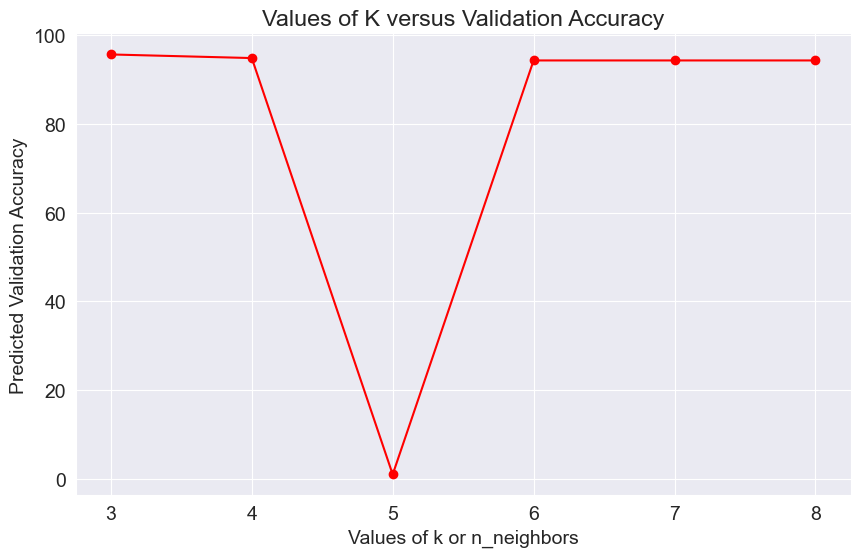

In [79]:
# Plotting validation score V/S values of k
plt.plot(range(3,9), score, color = 'red', marker = 'o')
plt.xlabel('Values of k or n_neighbors')
plt.ylabel('Predicted Validation Accuracy')
plt.title('Values of K versus Validation Accuracy')
plt.show()

So, from the above results, research and conclusion, we can conlude that our best Knn model has n_neighbors value to be 3 respectively.

### Tuning the weights parameter

The weights parameter for our Knn model has two values: uniform and distance. By default, it is uniform. Lets check the accuracy when measured with weights parameter valued with distance value and n_neighbors value to be 3.

<b> When weights = uniform? </b>

In [80]:
%%time
Knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 3, weights = 'uniform')
Knn.fit(X_train,y_train)
n_3_pred = Knn.predict(X_val)
n_3_pred_accuracy = accuracy_score(y_val, n_3_pred)*100
n_3_pred_accuracy

CPU times: total: 3min 6s
Wall time: 39 s


95.6439362599904

<b> When wights = distance? </b>

In [81]:
%%time

Knn_weight = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1, weights = 'distance').fit(X_train, y_train)
weight_distance_accuracy = accuracy_score(y_val, Knn_weight.predict(X_val))
weight_distance_accuracy

CPU times: total: 3min 4s
Wall time: 35.2 s


0.9732513692849933

we can see that, when `weights = distance`, our model performs better than when `weights = uniform`.

## Lets make the predictions on the Testing set

In [82]:
# our testing set 
test_new_df[numeric_feature_cols]

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,-0.086237,-0.748259,-0.807726,3.686720,0.231779,-0.359539,-1.119518,-0.265267,-0.238101,0.37487,0.036459,-0.25066,0.712024,0.093365,-1.068274,-0.244269,-0.468227,0.665363,0.0,0.424004,0.0,0.553032,0.455530
1,-0.086237,-0.748259,-0.807726,3.686720,0.231779,-0.359539,-1.119518,-0.265267,-0.238101,0.37487,0.036459,-0.25066,0.712024,0.093365,-1.068274,-0.244269,-0.468227,0.665363,0.0,0.424004,0.0,0.553032,0.453587
2,-0.086237,-0.748259,-0.807726,3.686720,0.344428,-0.140801,-1.119518,-0.265267,-0.238101,0.37487,0.089394,-0.25066,0.713826,0.266677,-1.068274,-0.244269,-0.468227,0.671834,0.0,0.424004,0.0,0.553032,0.452158
3,-0.086237,-0.748259,-0.807726,3.686720,0.344428,-0.140801,-1.119518,-0.265267,-0.238101,0.37487,0.089394,-0.25066,0.713826,0.266677,-1.068274,-0.244269,-0.468227,0.671834,0.0,0.424004,0.0,0.553032,0.453396
4,-0.086237,-0.748259,-0.807726,3.686720,0.344428,-0.140801,-1.119518,-0.265267,-0.238101,0.37487,0.089394,-0.25066,0.712024,0.093365,-1.068274,-0.244269,-0.468227,0.679922,0.0,0.424004,0.0,0.553032,0.450718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.068274,-0.315493,-0.468227,-1.710983,0.0,-1.102174,0.0,-1.859348,0.504984
120836,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.068274,-0.315493,-0.468227,-1.712600,0.0,-1.102174,0.0,-1.859348,0.504884
120837,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.068274,-0.315493,-0.468227,-1.715836,0.0,-1.102174,0.0,-1.859348,0.501330
120838,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.118540,-0.315493,-0.468227,-1.712600,0.0,-1.102174,0.0,-1.859348,0.499589


<b> We will use our optimized KNN model, that has hyperparameters tuned to n_neighbors=3 and weights=distance.<b>

In [85]:
%%time

testingSet = test_new_df[numeric_feature_cols]
testing_set_predictions = Knn_weight.predict(testingSet)

CPU times: total: 3min 6s
Wall time: 35.5 s


In [86]:
testing_set_predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [87]:
solution_df

,TrialID,ObsNum,Prediction,Indicator
0,0,0,1,Public
1,0,1,1,Public
2,0,2,1,Private
3,0,3,1,Private
4,0,4,1,Private
...,...,...,...,...
120835,99,1206,1,Private
120836,99,1207,1,Private
120837,99,1208,1,Private
120838,99,1209,1,Private


In [88]:
accuracy_score(solution_df['Prediction'], testing_set_predictions)

0.7112545514730222

In [89]:
solution_df.Prediction.value_counts()/ len(solution_df.Prediction)

Prediction
1    0.75245
0    0.24755
Name: count, dtype: float64

We can clearly see that the model that we have developed isn't performing well. In the testing set, if a random row is selected, the chances of column prediction's value to be 1 is 75 %. And, out models accuracy is only 71%. 

In [90]:
# lets create a csv file and save our prediction for this model to be uploaded in kaggle
solution_Knn_df = solution_df.copy()
solution_Knn_df['Prediction'] = testing_set_predictions

In [91]:
# saving out predictions to a new file called 'submission_knn.csv'
solution_Knn_df.to_csv('submission_knn.csv', index = False)

# We will now try another model: Logistic Regression
# ---------------------------------------------------------------------------------------------------------------

Logistic regression is a very popular technique to solve binary classification problems. This project is also a binary classification problem because the `Target` column has only 2 responses i.e 0 and 1 ,where 0 represents that the driver is not alert and 1 represents driver is alert.

In [92]:
# To train our logistic regression model, lets import logistic regression class from sklearn library
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(n_jobs = -1)

In [93]:
trainingSet

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,IsAlert
517921,1.026033,-0.748259,-0.807726,-0.288786,0.119130,0.980233,0.303842,-0.615548,-0.859680,0.374870,0.036459,4.399439,-0.974732,0.526645,-1.068274,-0.291982,-0.468227,-1.592893,0.0,-1.102174,0.0,-0.251094,0.503847,1
540287,-1.082106,-0.748259,-0.807726,-0.288786,0.119130,2.101267,0.267346,-0.615548,-0.859680,0.374870,0.830487,-0.250660,0.394588,0.526645,1.455078,-0.244269,-0.468227,0.220506,0.0,0.103160,0.0,0.553032,-0.006108,0
244957,1.853768,-0.748259,-0.807726,-0.288786,0.119130,-0.277513,-0.499079,0.085015,-0.238101,0.374870,0.089394,-0.250660,0.761362,-0.079947,-0.260667,-0.291982,-0.468227,0.743011,0.0,1.681367,0.0,0.553032,0.270053,1
374229,1.543367,1.334087,1.923399,-0.288786,-0.106168,1.034918,0.121360,0.085015,1.005057,0.374870,0.142329,-0.250660,0.716529,0.093365,-0.210401,-0.291982,-0.468227,0.662128,0.0,0.189874,0.0,0.553032,-0.435234,0
471795,0.185364,-0.748259,-0.807726,-0.288786,0.231779,-0.550936,-3.309303,-0.265267,-0.238101,0.374870,-0.016476,-0.250660,0.718332,0.526645,-1.118540,-0.291982,-0.468227,0.655657,0.0,-1.102174,0.0,0.553032,0.063448,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,-1.004505,-0.304101,0.702900,-0.288786,-0.725737,-0.058774,2.019174,2.186701,1.005057,-2.667592,1.942127,-0.250660,-0.666308,0.526645,0.597205,-0.220759,-0.468227,-1.372891,0.0,-1.102174,0.0,0.553032,-0.443651,0
259178,-0.034503,1.648343,1.752904,-0.288786,-0.218817,-0.113459,-0.207108,0.085015,-0.238101,0.374870,0.248200,-0.250660,0.877838,0.786613,1.455078,-0.220759,-0.468227,0.872424,0.0,-1.102174,0.0,0.553032,0.362862,1
365838,-0.357837,1.344052,-0.762440,-0.288786,-0.387790,-0.004090,0.267346,0.085015,-0.859680,0.374870,-1.075181,-0.250660,0.456318,0.266677,-1.118540,-0.315493,-0.468227,0.303007,0.0,0.814220,0.0,0.553032,-0.422174,0
131932,-0.319037,1.336934,0.824353,-0.288786,0.006481,-0.222828,-0.280100,-0.265267,-0.238101,0.374870,0.512876,-0.250660,0.542605,0.093365,0.597205,-0.220759,-0.468227,0.419479,0.0,0.554076,0.0,0.553032,-0.305589,0


In [94]:
validationSet

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,IsAlert
551187,0.262964,1.551468,0.548411,-0.288786,0.344428,-0.004090,1.216253,0.435296,0.383478,0.37487,0.142329,-0.25066,0.704589,-0.079947,-1.068274,-0.291982,-0.468227,0.705805,0.0,0.831563,0.0,0.553032,-0.063343,0
155822,-0.409571,-0.742066,-0.652994,-0.288786,0.119130,0.870864,0.267346,-0.615548,0.383478,0.37487,-0.651699,-0.25066,-1.733963,-0.599884,-1.118540,-0.149536,-0.468227,-1.706130,0.0,-1.102174,0.0,-1.859348,-0.199969,1
186872,-0.306104,1.284048,0.935568,-0.288786,-0.556763,-0.250170,-0.061122,-0.265267,-0.238101,0.37487,0.301135,-0.25066,0.509487,-0.599884,0.647471,-0.267780,-0.468227,0.443744,0.0,-0.729301,0.0,0.553032,-0.145542,1
66220,0.159497,1.538229,0.526251,-0.288786,0.231779,-0.058774,-0.791050,-0.265267,-0.238101,0.37487,-0.016476,-0.25066,0.771275,0.266677,-0.260667,-0.267780,-0.468227,0.728452,0.0,-0.408457,0.0,0.553032,-0.238162,1
541241,0.857899,-0.748259,-0.807726,-0.288786,0.119130,-0.386882,1.909685,-0.615548,-0.859680,0.37487,0.248200,-0.25066,0.699182,-0.339916,1.505344,-0.315493,-0.468227,0.642716,0.0,0.571419,0.0,0.553032,-0.082187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70728,0.185364,-0.748259,-0.807726,-0.288786,0.288103,-0.222828,-0.718057,-0.265267,-0.238101,0.37487,0.459941,-0.25066,0.958943,0.093365,-0.260667,-0.244269,-0.468227,0.940366,0.0,-0.503843,0.0,0.553032,-0.268538,1
438945,-0.991572,-0.748259,-0.807726,-0.288786,-1.120008,1.636448,-1.849446,0.435296,-0.238101,0.37487,0.936358,-0.25066,0.667867,-0.079947,0.597205,-0.267780,-0.468227,0.584480,0.0,-0.408457,0.0,0.553032,0.166816,1
557129,-0.461304,1.577306,0.209738,-0.288786,-0.331465,0.788837,0.632310,0.085015,-0.859680,0.37487,0.301135,-0.25066,0.925600,-1.293133,1.505344,-0.291982,2.135718,1.115073,0.0,0.458690,0.0,0.553032,0.022510,0
449348,-1.107972,-0.747191,1.521092,-0.288786,0.119130,-0.113459,0.303842,-0.615548,-0.859680,0.37487,-0.916375,-0.25066,-1.733963,-0.599884,-0.260667,1.486532,2.135718,-1.725542,0.0,-1.102174,0.0,-0.251094,0.141309,1


In [95]:
X_train_log_reg = trainingSet[numeric_feature_cols]

In [96]:
y_train_log_reg = trainingSet['IsAlert']

In [97]:
X_train_log_reg.shape, y_train_log_reg.shape

((483463, 23), (483463,))

In [98]:
%%time 


# Let's train our logistic regression model using fit() method
log_reg.fit(X_train_log_reg, y_train_log_reg)

CPU times: total: 78.1 ms
Wall time: 1.96 s


LogisticRegression(n_jobs=-1)

In [99]:
log_reg.coef_

array([[ 2.91032842e-04,  6.42172153e-02, -1.00488959e-01,
         1.67310936e-01,  2.35467270e-03, -1.82015296e-01,
        -4.08708105e-01, -1.35190350e-01, -3.37463892e-01,
         1.05763279e+00,  1.36795793e-01, -1.04627128e-02,
        -6.97104932e-01, -7.41228054e-03, -1.26556747e-01,
        -2.68511432e-02, -2.31355911e-02,  2.58617315e-01,
         0.00000000e+00, -7.29493506e-02,  0.00000000e+00,
        -1.37860773e-01,  2.09789372e+00]])

Here, each value in the above list is a weight that is applied to the respective column in the training set. Similarly, lets check the intercept.

In [100]:
log_reg.intercept_

array([0.38792004])

In [101]:
%%time

# Lets make predictions on the training set
training_pred = log_reg.predict(X_train_log_reg)

CPU times: total: 15.6 ms
Wall time: 20.2 ms


### Let's Measure the accuracy for the training set


In [103]:
from sklearn.metrics import accuracy_score
training_accuracy = accuracy_score(y_train_log_reg, training_pred) * 100

In [104]:
training_accuracy

79.06396146137347

<b> Lets measure the accuracy for validation set. </b>

In [106]:
X_train_vali = validationSet[numeric_feature_cols]
y_train_vali = validationSet['IsAlert']

In [107]:
X_train_vali.shape, y_train_vali.shape

((120866, 23), (120866,))

In [108]:
%%time
validating_accuracy = accuracy_score(y_train_vali, log_reg.predict(X_train_vali))*100

CPU times: total: 0 ns
Wall time: 11.5 ms


In [109]:
validating_accuracy

78.92293945360979

Our training accuracy is 79.1 % whereas our validation accuracy is 78.95 %. Thus, we can make a conclusion that our model has not overfitted with the training set.

## Hyperparameter Tuning for the Logistic Regression model
### Lets tune the hyperparameter `max_iter`
By default, the hyperparameter max_iter is set to 100 for our logistic regression model. So, lets check our models performance for both training and validation set by tuning max_iter hyperparameter.

In [110]:
%%time 

training_accuracy_maxIterTuned = []
validation_accuracy_maxIterTuned = []

for i in [50,75,100,150,200,250,300,350,400,450,500,750,1000]:
    log_reg = LogisticRegression(max_iter = i, n_jobs = -1)
    log_reg.fit(X_train_log_reg,y_train_log_reg)
    training_accuracy = accuracy_score(y_train_log_reg, log_reg.predict(X_train_log_reg))*100
    validating_accuracy = accuracy_score(y_train_vali, log_reg.predict(X_train_vali))*100
    
    training_accuracy_maxIterTuned.append(training_accuracy)
    validation_accuracy_maxIterTuned.append(validating_accuracy)
    
    print("When max_iter is {}, the training accuracy is {} and validation accuracyis {}.".format(i, training_accuracy, validating_accuracy))

When max_iter is 50, the training accuracy is 79.06396146137347 and validation accuracyis 78.92293945360979.
When max_iter is 75, the training accuracy is 79.06396146137347 and validation accuracyis 78.92293945360979.
When max_iter is 100, the training accuracy is 79.06396146137347 and validation accuracyis 78.92293945360979.
When max_iter is 150, the training accuracy is 79.06396146137347 and validation accuracyis 78.92293945360979.
When max_iter is 200, the training accuracy is 79.06396146137347 and validation accuracyis 78.92293945360979.
When max_iter is 250, the training accuracy is 79.06396146137347 and validation accuracyis 78.92293945360979.
When max_iter is 300, the training accuracy is 79.06396146137347 and validation accuracyis 78.92293945360979.
When max_iter is 350, the training accuracy is 79.06396146137347 and validation accuracyis 78.92293945360979.
When max_iter is 400, the training accuracy is 79.06396146137347 and validation accuracyis 78.92293945360979.
When max_ite

<b> Visually representing the above calculations. </b>

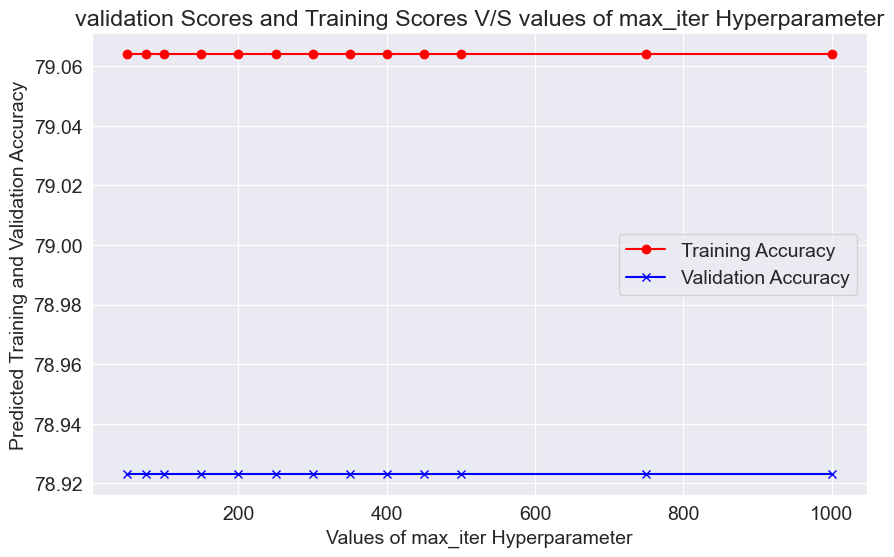

In [111]:
# Plotting validation Scores and Training Scores V/S values of max_iter Hyperparameter
plt.plot([50,75,100,150,200,250,300,350,400,450,500,750,1000], training_accuracy_maxIterTuned, color = 'red', marker = 'o')
plt.plot([50,75,100,150,200,250,300,350,400,450,500,750,1000], validation_accuracy_maxIterTuned, color = 'blue', marker = 'x')
plt.xlabel('Values of max_iter Hyperparameter')
plt.ylabel('Predicted Training and Validation Accuracy')
plt.title('validation Scores and Training Scores V/S values of max_iter Hyperparameter')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

Well, we can see that the change in hyperparameter max_iter doesnot result in change in the predictions. So, we will let the original value of max_iter be used in our model.

### Lets tune the hyperparameter `solver` 

By default, our logistic regression model has the value of max_iter parameter set to `lbfgs`. But, we will check our model performance on both training and validation set by tuning the values of max_iter.

In [112]:
# Hence, this is our optimized model
log_reg = LogisticRegression(n_jobs = -1, max_iter = 100)

In [113]:
%%time 

solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
training_accuracy_maxIterTuned = []
validation_accuracy_maxIterTuned = []

for i in solver_list:
    log_reg = LogisticRegression(n_jobs = -1, max_iter = 100, solver = i)
    log_reg.fit(X_train_log_reg,y_train_log_reg)
    training_accuracy = accuracy_score(y_train_log_reg, log_reg.predict(X_train_log_reg))*100
    validating_accuracy = accuracy_score(y_train_vali, log_reg.predict(X_train_vali))*100
    
    training_accuracy_maxIterTuned.append(training_accuracy)
    validation_accuracy_maxIterTuned.append(validating_accuracy)
    
    print("When solver is "+i+" the training accuracy is "+str(training_accuracy)+" and validation accuracy is "+str(validating_accuracy)+" .")

When solver is newton-cg the training accuracy is 79.06396146137347 and validation accuracy is 78.92459417867721 .
When solver is lbfgs the training accuracy is 79.06396146137347 and validation accuracy is 78.92293945360979 .


C:\Users\arfan\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.



When solver is liblinear the training accuracy is 79.06354777925094 and validation accuracy is 78.92211209107607 .
When solver is sag the training accuracy is 79.06334093818968 and validation accuracy is 78.92211209107607 .
When solver is saga the training accuracy is 79.064375143496 and validation accuracy is 78.92211209107607 .
CPU times: total: 7.31 s
Wall time: 12.7 s


In [114]:
print('The training accuracy is maximum when solver = '+solver_list[training_accuracy_maxIterTuned.index(max(training_accuracy_maxIterTuned))])

The training accuracy is maximum when solver = saga


In [115]:
print('The Validation accuracy is maximum when solver = '+solver_list[validation_accuracy_maxIterTuned.index(max(validation_accuracy_maxIterTuned))])

The Validation accuracy is maximum when solver = newton-cg


In [116]:
# Hence, our new optimized model is given below
log_reg = LogisticRegression(n_jobs = -1, solver = 'newton-cg', max_iter = 100)

### Lets tune the hyperparameter `C` 

The C parameter controls the penality strength. Our model can also be effective by tuning this hyperparameter. By default, our logistic regression model has value of C set to 1.0. So, lets tune it with different values.

In [117]:
# Hence, our new optimized model is given below
log_reg = LogisticRegression(n_jobs = -1, solver = 'newton-cg', max_iter = 100)

In [118]:
%%time

C_list =  [100, 10, 1.0, 0.1, 0.01]
training_accuracy_maxIterTuned = []
validation_accuracy_maxIterTuned = []

for i in C_list:
    log_reg = LogisticRegression(n_jobs = -1, solver = 'newton-cg', max_iter = 100, C = i)
    log_reg.fit(X_train_log_reg,y_train_log_reg)
    training_accuracy = accuracy_score(y_train_log_reg, log_reg.predict(X_train_log_reg))*100
    validating_accuracy = accuracy_score(y_train_vali, log_reg.predict(X_train_vali))*100
    
    training_accuracy_maxIterTuned.append(training_accuracy)
    validation_accuracy_maxIterTuned.append(validating_accuracy)
    
    print("When value of C is {}, the training accuracy is {} and validation accuracyis {}.".format(i, training_accuracy, validating_accuracy))

When value of C is 100, the training accuracy is 79.06375462031221 and validation accuracyis 78.92459417867721.
When value of C is 10, the training accuracy is 79.06416830243472 and validation accuracyis 78.92459417867721.
When value of C is 1.0, the training accuracy is 79.06396146137347 and validation accuracyis 78.92459417867721.
When value of C is 0.1, the training accuracy is 79.06727091835363 and validation accuracyis 78.91963000347492.
When value of C is 0.01, the training accuracy is 79.09416025631745 and validation accuracyis 78.96927175549783.
CPU times: total: 391 ms
Wall time: 18.5 s


In [119]:
print('The training accuracy is maximum when value of C = '+str(C_list[training_accuracy_maxIterTuned.index(max(training_accuracy_maxIterTuned))]))

The training accuracy is maximum when value of C = 0.01


In [120]:
print('The Validation accuracy is maximum when value of C = '+str(C_list[validation_accuracy_maxIterTuned.index(max(validation_accuracy_maxIterTuned))]))

The Validation accuracy is maximum when value of C = 0.01


In [121]:
# Thus, Our final optimized/ Tuned model is given below
log_reg = LogisticRegression(n_jobs = -1, max_iter = 100, C = 0.01, solver = 'newton-cg')
log_reg.fit(X_train_log_reg,y_train_log_reg)

LogisticRegression(C=0.01, n_jobs=-1, solver='newton-cg')

## Lets Measure Accuracy on Training and Validation Set One Last Time Using Optimized Model

In [122]:
print('Training Accuracy With Optimized Model: ', round(accuracy_score(y_train_log_reg, log_reg.predict(X_train_log_reg))*100,3))

Training Accuracy With Optimized Model:  79.094


In [123]:
print('Validation Accuracy With Optimized Model: ', round(accuracy_score(y_train_vali, log_reg.predict(X_train_vali))*100,3))

Validation Accuracy With Optimized Model:  78.969


# Predictions on the `Testing Set` with optimized logistic regression model

In [124]:
#  our testing set
test_new_df[numeric_feature_cols]

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,-0.086237,-0.748259,-0.807726,3.686720,0.231779,-0.359539,-1.119518,-0.265267,-0.238101,0.37487,0.036459,-0.25066,0.712024,0.093365,-1.068274,-0.244269,-0.468227,0.665363,0.0,0.424004,0.0,0.553032,0.455530
1,-0.086237,-0.748259,-0.807726,3.686720,0.231779,-0.359539,-1.119518,-0.265267,-0.238101,0.37487,0.036459,-0.25066,0.712024,0.093365,-1.068274,-0.244269,-0.468227,0.665363,0.0,0.424004,0.0,0.553032,0.453587
2,-0.086237,-0.748259,-0.807726,3.686720,0.344428,-0.140801,-1.119518,-0.265267,-0.238101,0.37487,0.089394,-0.25066,0.713826,0.266677,-1.068274,-0.244269,-0.468227,0.671834,0.0,0.424004,0.0,0.553032,0.452158
3,-0.086237,-0.748259,-0.807726,3.686720,0.344428,-0.140801,-1.119518,-0.265267,-0.238101,0.37487,0.089394,-0.25066,0.713826,0.266677,-1.068274,-0.244269,-0.468227,0.671834,0.0,0.424004,0.0,0.553032,0.453396
4,-0.086237,-0.748259,-0.807726,3.686720,0.344428,-0.140801,-1.119518,-0.265267,-0.238101,0.37487,0.089394,-0.25066,0.712024,0.093365,-1.068274,-0.244269,-0.468227,0.679922,0.0,0.424004,0.0,0.553032,0.450718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.068274,-0.315493,-0.468227,-1.710983,0.0,-1.102174,0.0,-1.859348,0.504984
120836,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.068274,-0.315493,-0.468227,-1.712600,0.0,-1.102174,0.0,-1.859348,0.504884
120837,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.068274,-0.315493,-0.468227,-1.715836,0.0,-1.102174,0.0,-1.859348,0.501330
120838,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.118540,-0.315493,-0.468227,-1.712600,0.0,-1.102174,0.0,-1.859348,0.499589


In [125]:
# Thus, Our final optimized/ Tuned model is given below
log_reg_tuned = LogisticRegression(n_jobs = -1, max_iter = 100, C = 0.01, solver = 'newton-cg')
log_reg_tuned.fit(X_train_log_reg,y_train_log_reg)

LogisticRegression(C=0.01, n_jobs=-1, solver='newton-cg')

<b> Lets use the above model to make predictions on our testing set. </b>

In [126]:
%%time

testingSet = test_new_df[numeric_feature_cols]
testing_set_predictions = log_reg_tuned.predict(testingSet)

CPU times: total: 0 ns
Wall time: 20.1 ms


In [127]:
testing_set_predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [128]:
solution_df

,TrialID,ObsNum,Prediction,Indicator
0,0,0,1,Public
1,0,1,1,Public
2,0,2,1,Private
3,0,3,1,Private
4,0,4,1,Private
...,...,...,...,...
120835,99,1206,1,Private
120836,99,1207,1,Private
120837,99,1208,1,Private
120838,99,1209,1,Private


In [129]:
testing_accuracy = round(accuracy_score(solution_df['Prediction'], testing_set_predictions)*100, 3)

In [130]:
print("Testing Accuracy: ", testing_accuracy)

Testing Accuracy:  84.925


<b> Our testing accuracy is calculated to be 84.925 ,which is extremely better than the Knn model which has testing accuracy at best 71 % approximately. An increment of 10 % additional accuracy proves that this model is much better at measuring accuracy for this project to detect or classify whether the driver is alert or not. </b>

In [131]:
# lets create a csv file and save our prediction for this model to be uploaded in kaggle
solution_log_reg_df = solution_df.copy()
solution_log_reg_df['Prediction'] = testing_set_predictions

In [132]:
# saving out predictions to a new file called 'solution_log_reg.csv'
solution_log_reg_df.to_csv('solution_log_reg.csv', index = False)

In [141]:
# Lets create a sample dictionary
new_input = {'P3': 23,
             'E1': 400,
             'E2': 3.5,
             'E3': 600,
             'E4': 340,
             'E5': 542,
             'E6': 50,
             'E7': 878.5,
             'E8': 52.0,
             'E9': 2400,
             'E10': 3000,
             'E11': 13.0,
             'V1': 20.0,
             'V2': 89.0,
             'V3': 58.0,
             'V4': 1004.8,
             'V5': 1001.5,
             'V6': 8.0,
             'V7': 5.0,
             'V8': 25.7,
             'V9': 33.0,
             'V10': 290,
             'V11': 300}

In [142]:
# Converting the dictionary into a dataframe
pd.DataFrame([new_input])

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,23,400,3.5,600,340,542,50,878.5,52.0,2400,3000,13.0,20.0,89.0,58.0,1004.8,1001.5,8.0,5.0,25.7,33.0,290,300


In [143]:
# transforming / scaling the data from the dataframe
X = scaler.transform(pd.DataFrame([new_input]))

In [144]:
# Making predictions using our tuned model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(n_jobs = -1, max_iter = 100, C = 0.01, solver = 'newton-cg')

In [145]:
log_reg.fit(X_train_log_reg, y_train_log_reg)

LogisticRegression(C=0.01, n_jobs=-1, solver='newton-cg')

In [146]:
l = ['Not Alert', 'Alert']
prediction = log_reg.predict(X)

C:\Users\arfan\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [147]:
l[int(prediction)]

C:\Users\arfan\AppData\Local\Temp\ipykernel_19152\591383703.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



'Not Alert'

<b> Thus, the prediction that the driver is `Not Alert` has been made by the help of our logistic regression model.</b>

# Conclusion

I would Like to thank community and teachers for providing such a great machine learning course for free. Through their material, I learnt many things regarding data analysis, exploration, visualization, manipulation, and cleaning. I also learnt about different supervised learning algorithms. I have completed this project all by myself, without taking help from the solution found on the internet. I, however, have taken references of the syntax, methods, and hyperparameters from the previous jovian's course's notebooks and sklearn's official documentation.